# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


## From Scratch

In [3]:
# make some dummy data sklearn.datasets import make_blobs
# 1
from sklearn.datasets import make_blobs

data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0, cluster_std=0.5)

In [4]:
data

array([[-0.99610393,  2.32543854],
       [ 0.31831637,  4.07299503],
       [ 2.15418161,  0.94653906],
       ...,
       [ 1.00621742,  4.19752581],
       [-1.05850641,  3.3030477 ],
       [ 1.64016143,  4.25314658]])

In [5]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [6]:
# Initialise centroids 
# 2
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

In [7]:
data.shape

(2000, 2)

In [8]:
centroids

array([[-1.79503909,  3.52280087],
       [ 1.0830101 ,  3.6995005 ],
       [ 1.44464131,  5.00995118],
       [-1.58023035,  2.67127507]])

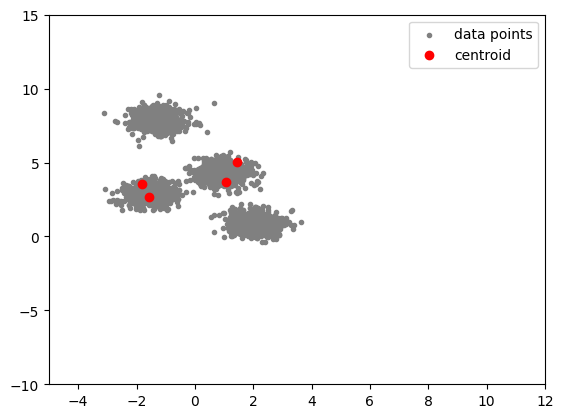

In [9]:
plot(data, centroids)

In [10]:
data

array([[-0.99610393,  2.32543854],
       [ 0.31831637,  4.07299503],
       [ 2.15418161,  0.94653906],
       ...,
       [ 1.00621742,  4.19752581],
       [-1.05850641,  3.3030477 ],
       [ 1.64016143,  4.25314658]])

In [11]:
centroids

array([[-1.79503909,  3.52280087],
       [ 1.0830101 ,  3.6995005 ],
       [ 1.44464131,  5.00995118],
       [-1.58023035,  2.67127507]])

In [12]:
# euclidian distance 3
# (x1-y1)**2 + (x2-y2)**2 + (x3-y3)**2 + ..
sum((data[0] - centroids[0])**2)**0.5

1.4394352859994684

In [13]:
# vectorized - 4
(((data - centroids[0])**2).sum(axis=1)**0.5)

array([1.43943529, 2.18380056, 4.71523796, ..., 2.88136977, 0.76861684,
       3.51198055])

In [14]:
def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((data - centroid)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist, distance])    
    return dist

In [15]:
d = euclidean(data, centroids)
print(d)

[[1.43943529 2.49213993 3.62820141 0.67882736]
 [2.18380056 0.85103153 1.46509205 2.35993612]
 [4.71523796 2.95401508 4.12489581 4.11345924]
 ...
 [2.88136977 0.50391102 0.92317414 3.00319053]
 [0.76861684 2.17790445 3.02973068 0.81934885]
 [3.51198055 0.78545629 0.78165294 3.58792986]]


In [16]:
assigned_c = d.argmin(axis=1)  # 5
print(assigned_c.shape)

(2000,)


In [17]:
import pandas as pd

In [18]:
pd.Series(assigned_c).value_counts()


1    809
2    618
3    323
0    250
Name: count, dtype: int64

In [19]:
data[assigned_c == 2].shape

(618, 2)

In [20]:
data[assigned_c == 2].mean(axis=0)

array([-0.46181543,  6.92029938])

In [21]:
centroids

array([[-1.79503909,  3.52280087],
       [ 1.0830101 ,  3.6995005 ],
       [ 1.44464131,  5.00995118],
       [-1.58023035,  2.67127507]])

In [22]:
# -- closest centroid - complete

In [23]:
data_size = 1000
num_iters = 15
num_clusters = 4


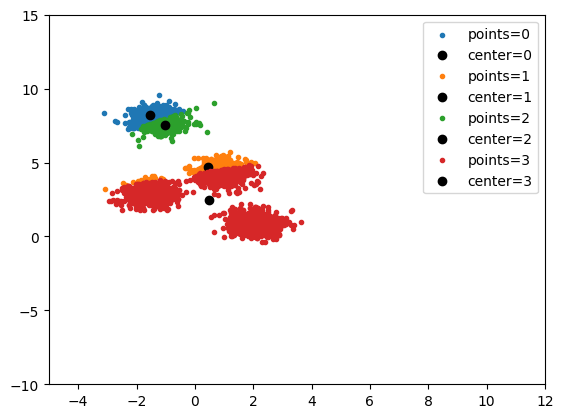

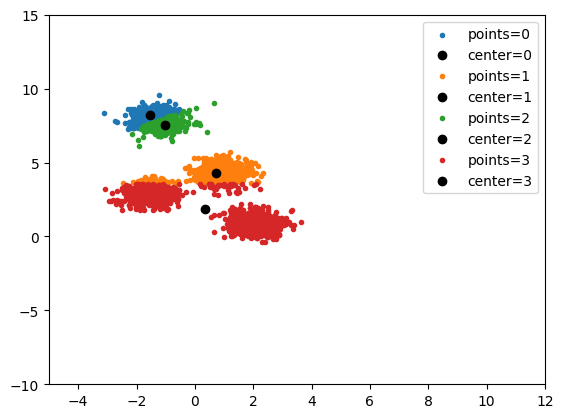

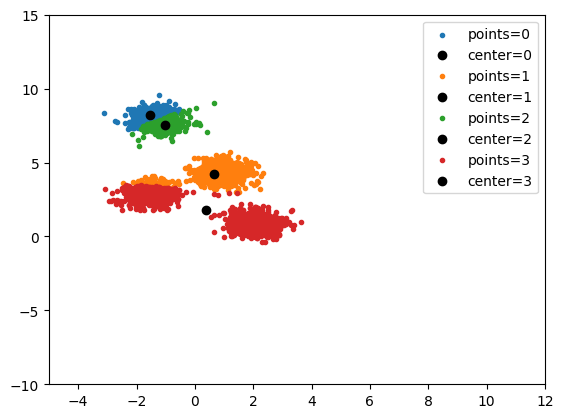

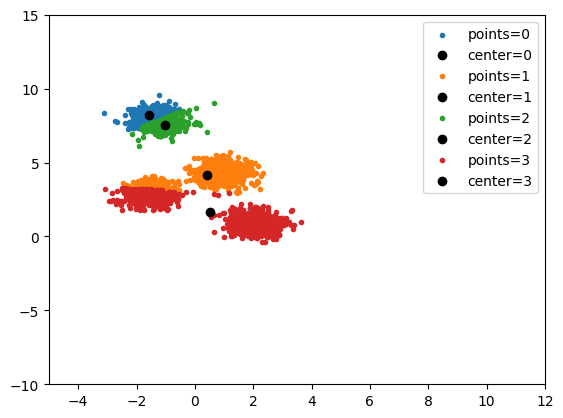

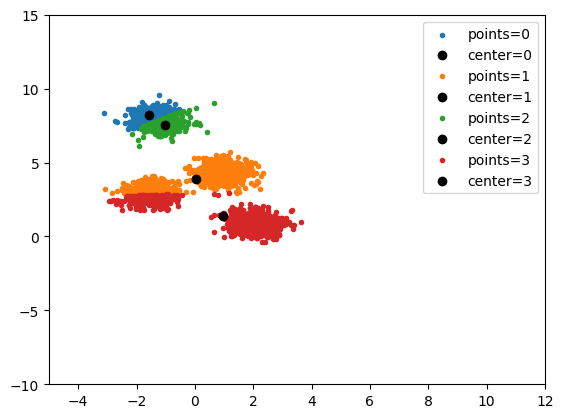

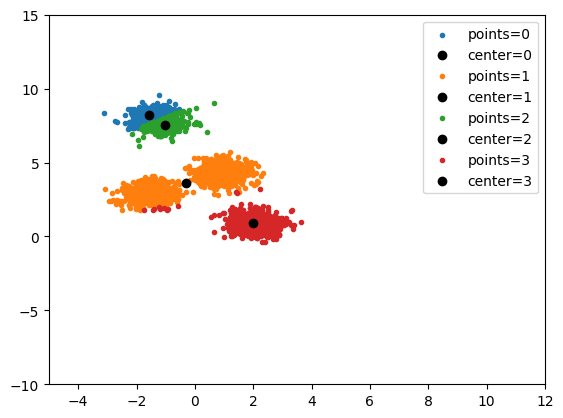

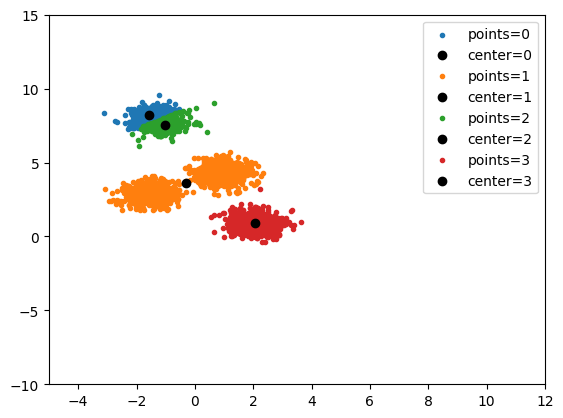

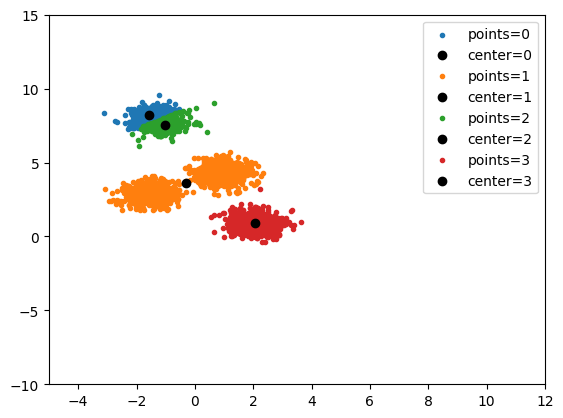

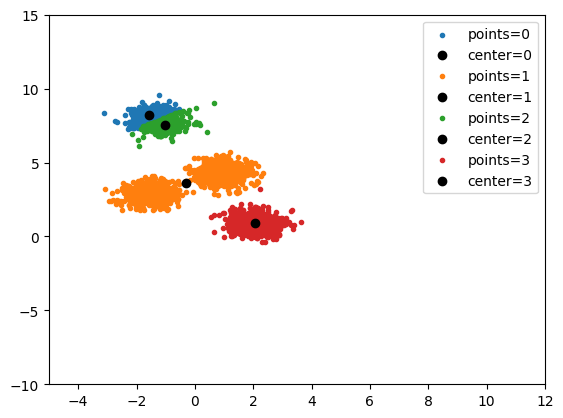

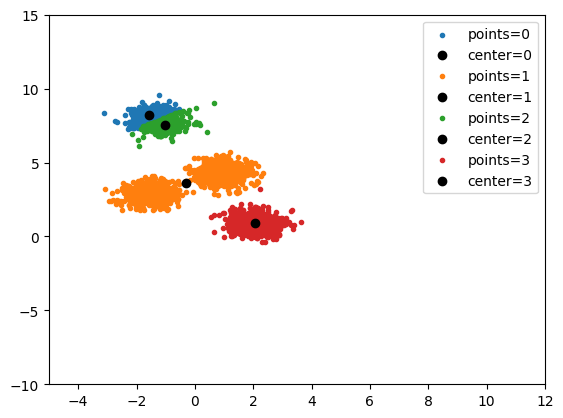

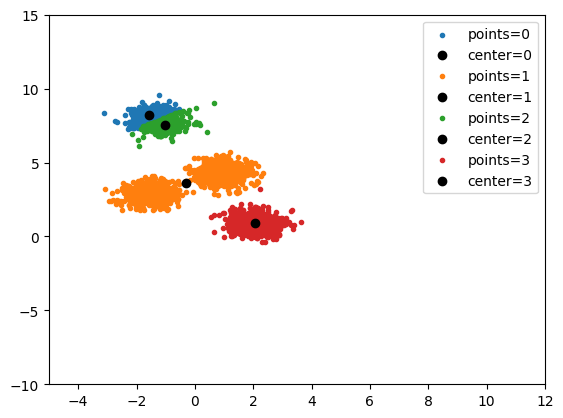

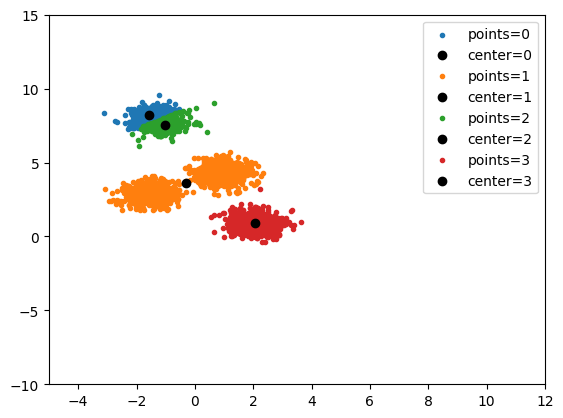

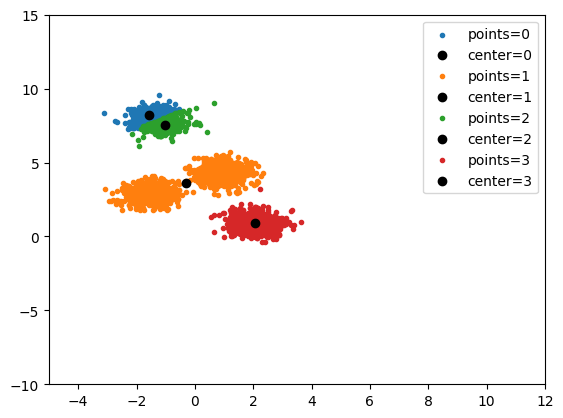

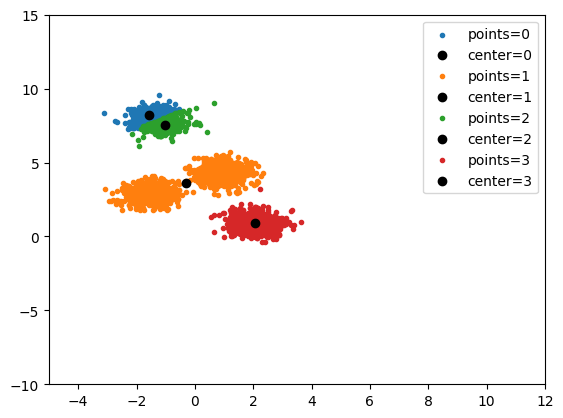

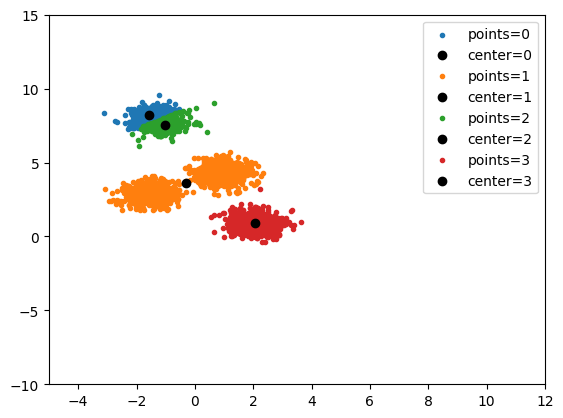

In [24]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)


def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

animation_df = pd.DataFrame()  # only for animation

# Loop over iterations
for n in range(num_iters):  

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)
    
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    
    # only for animation (skip)
    adf = pd.DataFrame()
    adf[['x', 'y']] = data
    adf['color'] = assigned_centroids
    adf['size'] = 5
    cdf = pd.DataFrame()
    cdf[['x','y']] = centroids
    cdf['color'] = 'red'
    cdf['size'] = 20
    adf = pd.concat([adf, cdf])
    adf['frame'] = n
    animation_df = pd.concat([animation_df, adf])


    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        
        # assign the new centroidq
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
    # plot(data, centroids)

In [25]:
import plotly.express as px

px.scatter(animation_df, x="x", y="y", animation_frame="frame", color="color", size='size', width=800, height=600)